### Regression for *3D* Model

importing essential libraries/packages

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from math import sqrt

Read dataset from csv file to dataset object

In [3]:
data = pd.read_csv("weight_dataset.csv")

In [4]:
data

Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]

In [7]:
data.head(10)

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801
5   Male  67.253016  152.212156
6   Male  68.785081  183.927889
7   Male  68.348516  167.971110
8   Male  67.018950  175.929440
9   Male  63.456494  156.399676

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


<Axes: xlabel='Height', ylabel='Weight'>

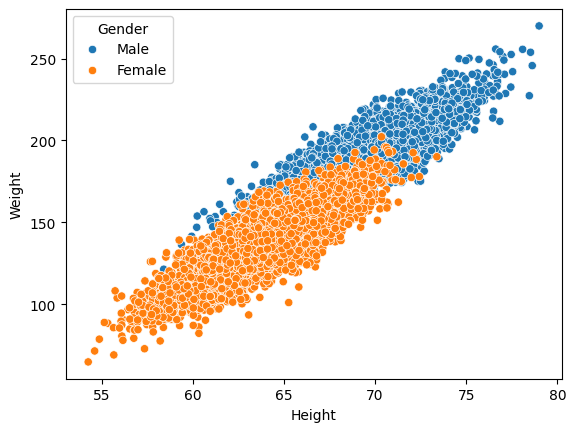

In [7]:
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=data)

In [8]:
data['Height']= data.Height.apply(lambda val : 2.54*val)

In [9]:
data['Weight']= data.Weight.apply(lambda val: 0.45359237*val)

Before heading on building our model,
we should pay attention to the observed facts from data:
gender is not a quantitive value and we need to asses a vlue into our object


#you could have used this code as welbut the latest version of *Pandas* no longer support it.
dataset['Gender'].replace('Female',0, inplace=True)
dataset['Gender'].replace('Male',1, inplace=True)

In [21]:
data.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True)

To train our data we should chooose 20% of the data randomly

In [13]:
x_train,x_test, y_train,y_test = train_test_split(data.drop('Weight',axis=1), data.Weight, test_size=0.2, random_state=101)

Build and fit the XGBRegressor.

In [14]:
regressor = XGBRegressor(n_estimators=100)
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

Predict *test* values and evaluate model performance

In [17]:
y_pred = regressor.predict(x_test)

print(f'MAE = {mean_absolute_error(y_test,y_pred)}')

MAE = 3.8255937755073584


In [18]:
print(f'XG Boost Regressor is about {round(regressor.score(x_test,y_test)*100)}% accurate!')

XG Boost Regressor is about 89% accurate!
